<a href="https://colab.research.google.com/github/edenbrln/Machine-Learning/blob/main/Zero_Shot_Learning_Based_Dog_vs_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import CLIPProcessor, CLIPModel

In [ ]:
# 모델과 프로세서 초기화
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# 분류할 레이블 정의
labels = ["a dog", "a cat"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
!wget https://s3-geospatial.s3.us-west-2.amazonaws.com/cat.jpeg
!wget https://s3-geospatial.s3.us-west-2.amazonaws.com/dog.jpeg
!wget https://s3-geospatial.s3.us-west-2.amazonaws.com/dogs.jpeg

--2024-06-27 05:04:35--  https://s3-geospatial.s3.us-west-2.amazonaws.com/cat.jpeg
Resolving s3-geospatial.s3.us-west-2.amazonaws.com (s3-geospatial.s3.us-west-2.amazonaws.com)... 52.92.163.26, 52.92.181.58, 3.5.83.186, ...
Connecting to s3-geospatial.s3.us-west-2.amazonaws.com (s3-geospatial.s3.us-west-2.amazonaws.com)|52.92.163.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8098 (7.9K) [image/jpeg]
Saving to: ‘cat.jpeg’

cat.jpeg            100%[===================>]   7.91K  --.-KB/s    in 0s      

2024-06-27 05:04:35 (223 MB/s) - ‘cat.jpeg’ saved [8098/8098]

--2024-06-27 05:04:35--  https://s3-geospatial.s3.us-west-2.amazonaws.com/dog.jpeg
Resolving s3-geospatial.s3.us-west-2.amazonaws.com (s3-geospatial.s3.us-west-2.amazonaws.com)... 52.92.163.26, 52.92.181.58, 3.5.83.186, ...
Connecting to s3-geospatial.s3.us-west-2.amazonaws.com (s3-geospatial.s3.us-west-2.amazonaws.com)|52.92.163.26|:443... connected.
HTTP request sent, awaiting response... 200 O

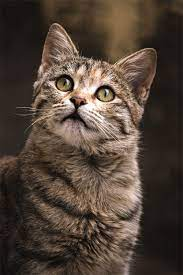

In [ ]:
from IPython.display import Image

Image('cat.jpeg')

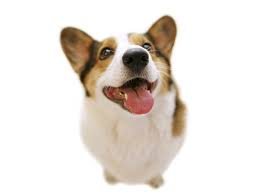

In [ ]:
Image('dog.jpeg')

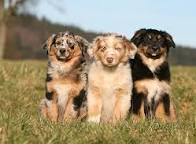

In [ ]:
Image('dogs.jpeg')

In [ ]:
from PIL import Image

def classify(file_path):
    # 이미지 로드 (예시 경로: "path/to/your/image.jpg")
    image = Image.open(file_path)

    # 이미지와 텍스트를 모델에 입력하기 위한 처리
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
    # 모델 예측
    outputs = model(**inputs)

    # 로짓스(scores)에서 softmax를 사용하여 확률 얻기
    probs = outputs.logits_per_image.softmax(dim=1)

    # 확률 출력
    for label, prob in zip(labels, probs[0]):
        print(f"{label}: {prob:.4f}")

In [ ]:
classify("dog.jpeg")

a dog: 0.9965
a cat: 0.0035


In [ ]:
classify("cat.jpeg")

a dog: 0.0043
a cat: 0.9957


In [ ]:
classify("dogs.jpeg")

a dog: 0.9987
a cat: 0.0013
